In [1]:
import math
import os
import time
from pathlib import Path
from typing import Union

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch
from matplotlib import patches
from torch.cuda.amp import autocast
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from torchvision.models.detection.mask_rcnn import MaskRCNN
from tqdm.auto import tqdm as tq

from craterdetection.detection.training import CraterInstanceDataset, collate_fn, load_checkpoint
from craterdetection.detection.visualisation import draw_patches

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
mlflow.set_tracking_uri("http://localhost:5000/")
mlflow.set_experiment("crater-detection")

In [3]:
dataset_path = "../data/dataset_instanced2.h5"
train_dataset = CraterInstanceDataset(dataset_path, "training")
train_loader = DataLoader(train_dataset, batch_size=10, num_workers=2, collate_fn=collate_fn, shuffle=True)

validation_dataset = CraterInstanceDataset(dataset_path, "validation")
validation_loader = DataLoader(validation_dataset, batch_size=10, num_workers=0, collate_fn=collate_fn)

test_dataset = CraterInstanceDataset(dataset_path, "test")
test_loader = DataLoader(test_dataset, batch_size=4, num_workers=0, collate_fn=collate_fn, shuffle=True)

In [4]:
NUM_CLASSES = 2

backbone = resnet_fpn_backbone('resnet50', pretrained=True, trainable_layers=5)

model = MaskRCNN(
    backbone=backbone,
    num_classes=NUM_CLASSES,
    min_size=256,
    max_size=256
)
model.cuda()
print()

In [15]:
pretrained = True
checkpoint_path = "../blobs/CraterRCNN_85177d4577044541964809f1ae686a2d.pth"

if pretrained:
    model, checkpoint = load_checkpoint(model, checkpoint_path)
else:
    checkpoint = dict()

model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
# optimizer = torch.optim.SGD(params, lr=1e-5, momentum=0.3, weight_decay=1e-6)
optimizer = SGD(params, lr=1e-4, momentum=0.1, weight_decay=1e-7)
# scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True, factor=0.1)
scheduler = StepLR(optimizer, step_size=10)

85177d4577044541964809f1ae686a2d

-----Epoch 32 started-----



Training [32]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [32]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 32/42
 	Average train loss: 2.550097360134125
 	Average validation loss: 1.8607201266288758
 	Duration: 5m 8s
-----Epoch 32 finished.-----


-----Epoch 33 started-----



Training [33]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [33]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 33/42
 	Average train loss: 2.585613431215286
 	Average validation loss: 2.5878126096725462
 	Duration: 5m 9s
-----Epoch 33 finished.-----


-----Epoch 34 started-----



Training [34]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [34]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 34/42
 	Average train loss: 2.628289633274078
 	Average validation loss: 2.27306792140007
 	Duration: 5m 13s
-----Epoch 34 finished.-----


-----Epoch 35 started-----



Training [35]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [35]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 35/42
 	Average train loss: 2.5882720645666124
 	Average validation loss: 2.167938404083252
 	Duration: 5m 13s
-----Epoch 35 finished.-----


-----Epoch 36 started-----



Training [36]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [36]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 36/42
 	Average train loss: 2.624346080303192
 	Average validation loss: 2.279862039089203
 	Duration: 5m 8s
-----Epoch 36 finished.-----


-----Epoch 37 started-----



Training [37]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [37]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 37/42
 	Average train loss: 2.6803402255773543
 	Average validation loss: 3.1930873727798463
 	Duration: 5m 10s
-----Epoch 37 finished.-----


-----Epoch 38 started-----



Training [38]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [38]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 38/42
 	Average train loss: 2.6474075407981874
 	Average validation loss: 2.1219511711597443
 	Duration: 5m 9s
-----Epoch 38 finished.-----


-----Epoch 39 started-----



Training [39]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [39]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 39/42
 	Average train loss: 2.6249934737682343
 	Average validation loss: 1.851554251909256
 	Duration: 5m 15s
-----Epoch 39 finished.-----


-----Epoch 40 started-----



Training [40]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [40]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 40/42
 	Average train loss: 2.621351261973381
 	Average validation loss: 9.510703282356262
 	Duration: 7m 28s
-----Epoch 40 finished.-----


-----Epoch 41 started-----



Training [41]:   0%|          | 0/1000 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_loss=0, loss_m…

Validation [41]:   0%|          | 0/100 [00:00<?, ?it/s, loss_box_reg=0, loss_classifier=0, loss_mask=0, loss_…


Summary:
 	Epoch: 41/42
 	Average train loss: 2.652483417749405
 	Average validation loss: 5.574362182617188
 	Duration: 6m 16s
-----Epoch 41 finished.-----



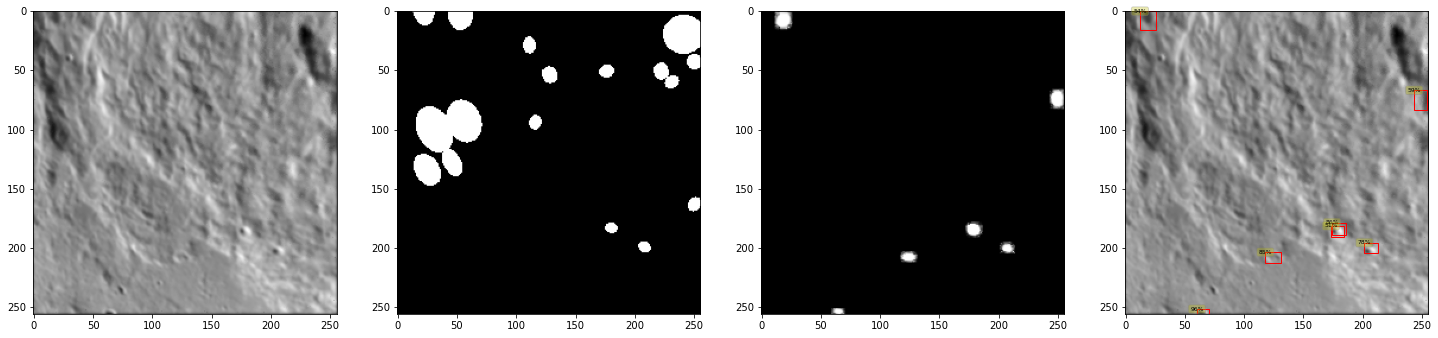

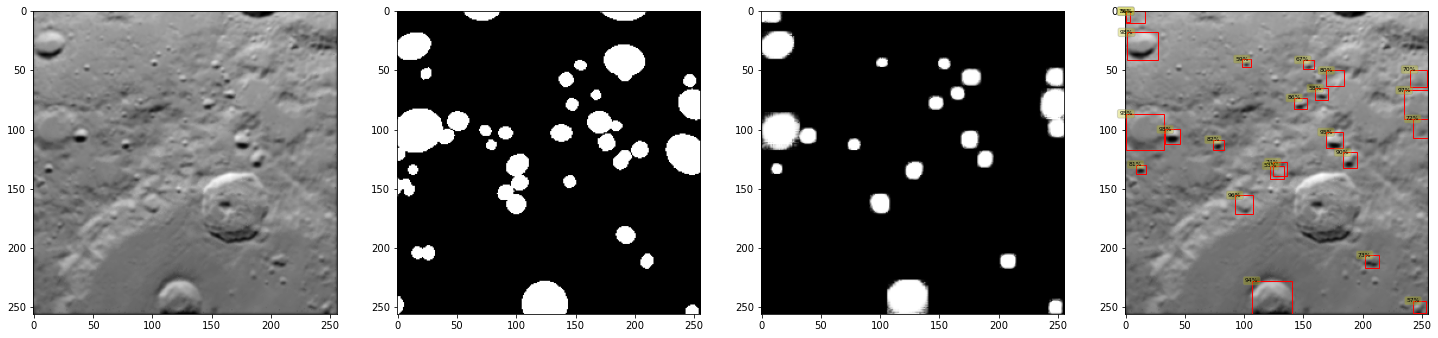

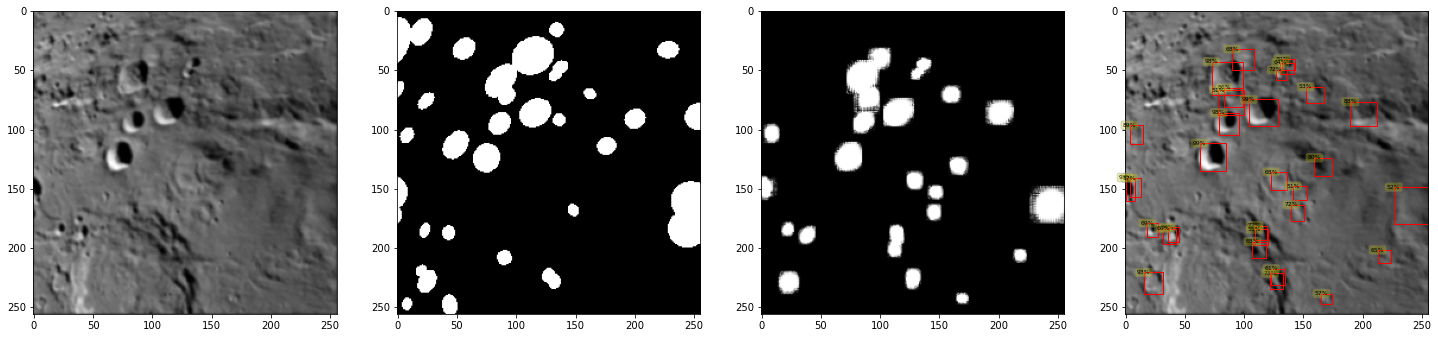

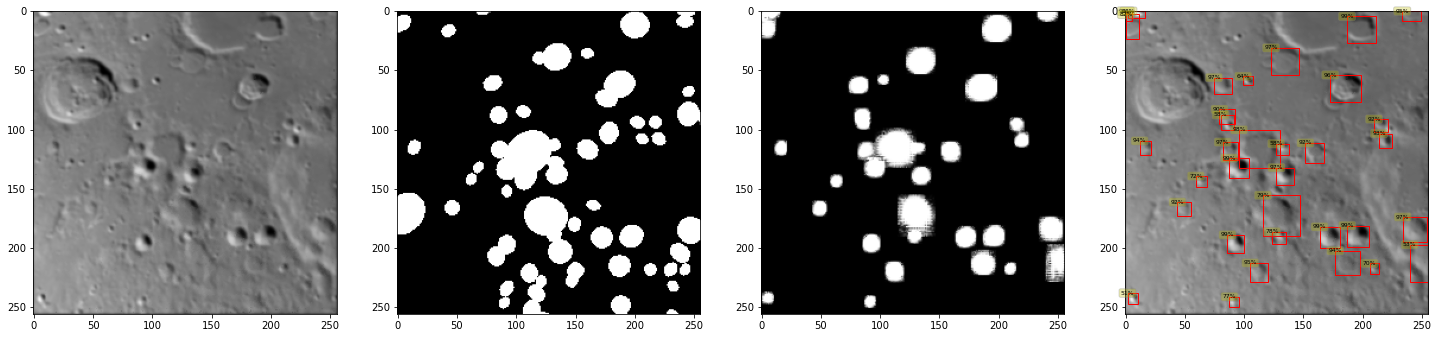

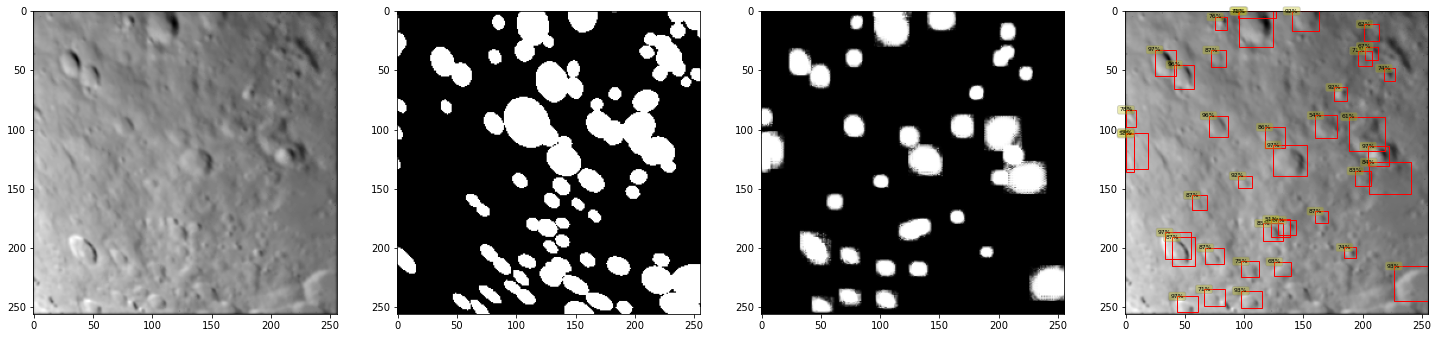

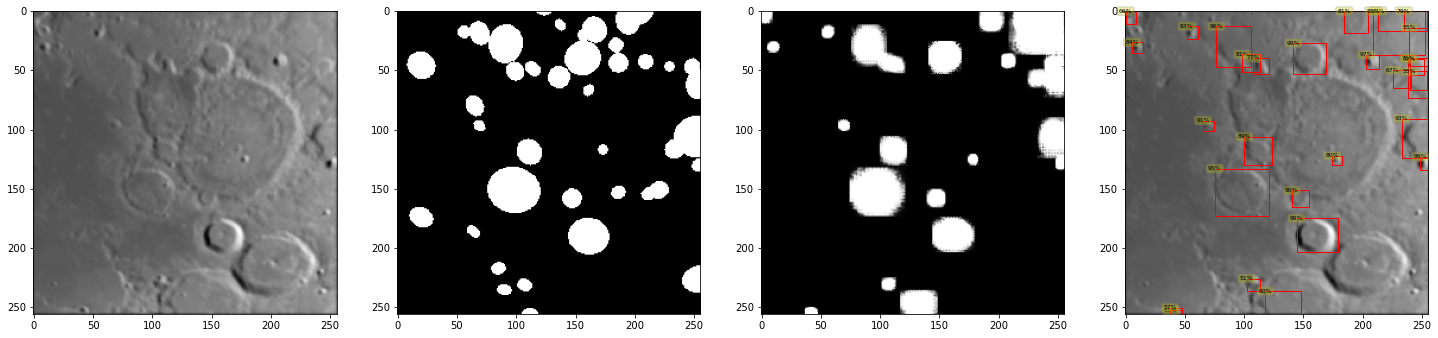

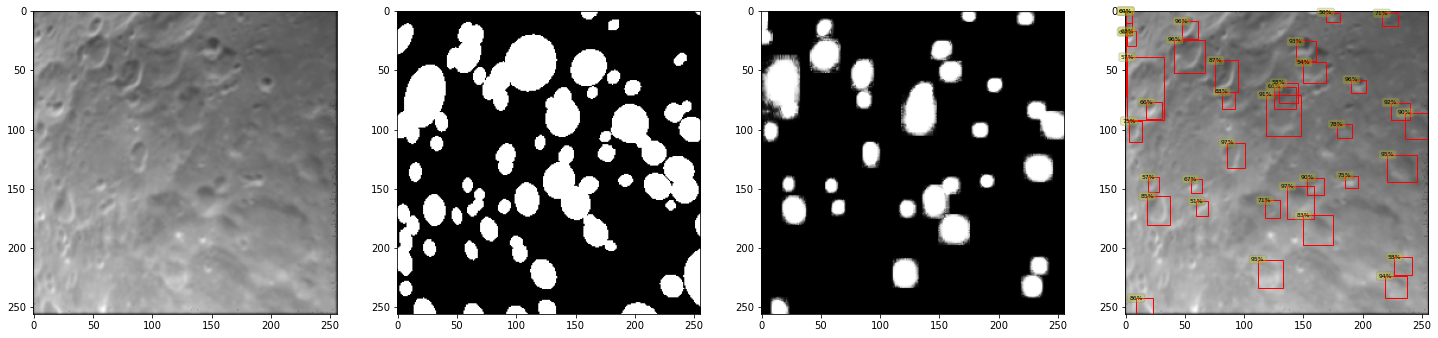

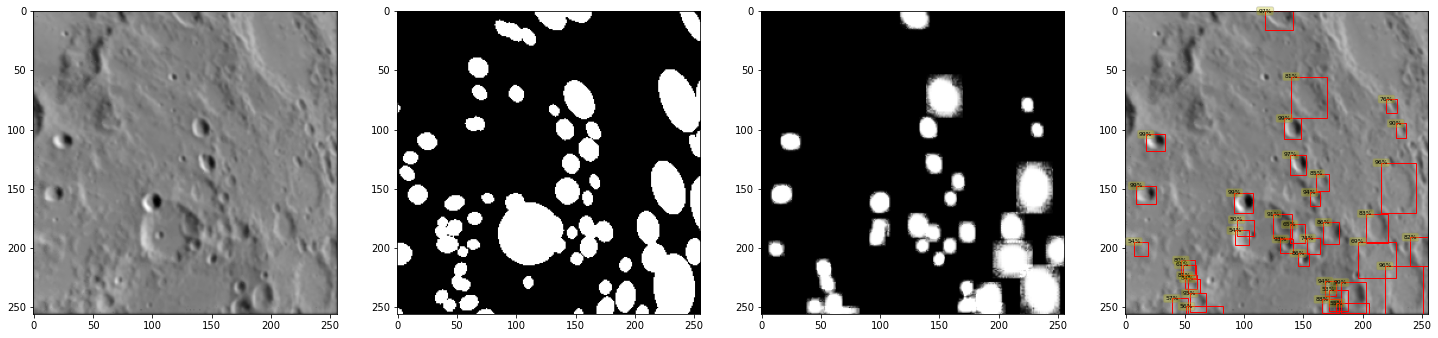

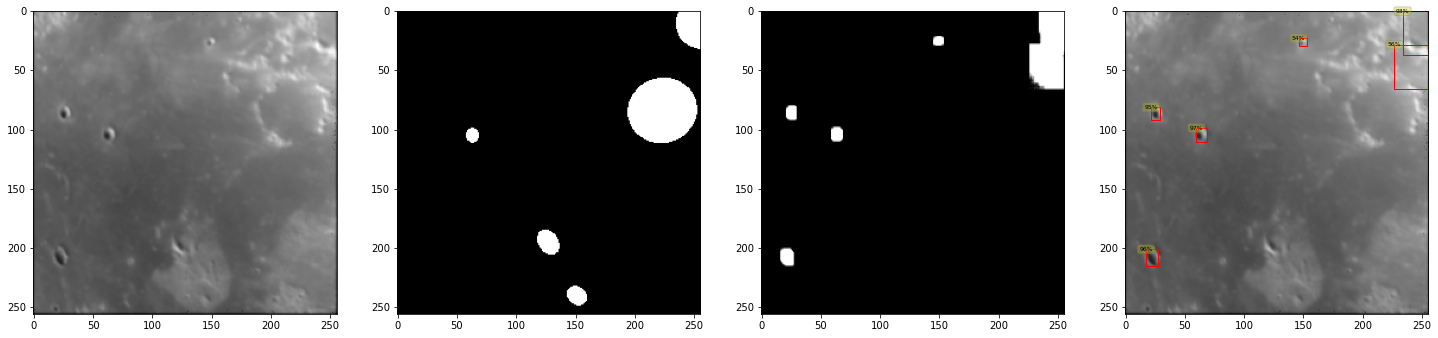

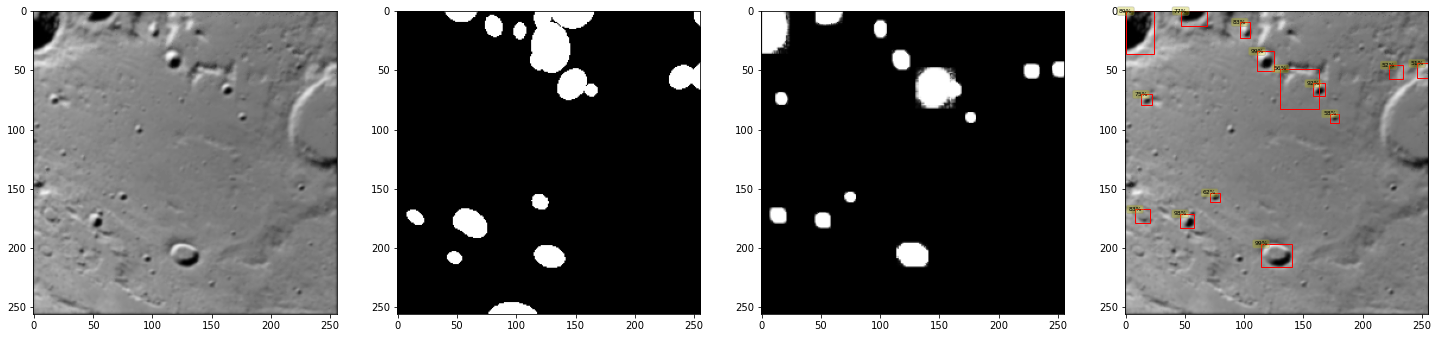

In [8]:
try:
    start_e = checkpoint['epoch'] + 1
except KeyError:
    start_e = 1

tracked_params = ('lr', 'momentum', 'weight_decay', 'dampening')

num_epochs = 10

name = "Mask RCNN"
name += " | Pretrained" if pretrained else " | Cold Start"

run_args = dict(run_name=name)

if pretrained:
    try:
        run_id = checkpoint['run_id']
        run_args['run_id'] = run_id
    except KeyError:
        print("No run ID found.")

with mlflow.start_run(**run_args) as run:
    run_id = run.info.run_id
    print(run_id)

    if pretrained:
        mlflow.log_param('checkpoint_file', os.path.basename(checkpoint_path))

    if not pretrained:
        mlflow.log_param('optimizer', type(optimizer).__name__)
        mlflow.log_param('dataset', os.path.basename(dataset_path))
        for tp in tracked_params:
            try:
                mlflow.log_param(tp, optimizer.state_dict()['param_groups'][0][tp])
            except KeyError as err:
                pass

    if pretrained:
        train_loss_list = checkpoint['avg_train_losses']
        valid_loss_list = checkpoint['avg_train_losses']
    else:
        train_loss_list = []
        valid_loss_list = []

    for e in range(start_e, num_epochs+start_e):
        print(f'\n-----Epoch {e} started-----\n')

        since = time.time()

        train_loss, valid_loss = 0, 0

        model.train()

        bar = tq(train_loader, desc=f"Training [{e}]",
                 postfix={
                     "loss_loss": 0.,
                     "loss_classifier": 0.,
                     "loss_box_reg": 0.,
                     "loss_mask": 0.,
                     "loss_objectness": 0.,
                     "loss_rpn_box_reg": 0
                 })
        for batch, (images, targets) in enumerate(bar, 1):
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            with autocast():
                loss_dict = model(images, targets)

            loss = sum(l for l in loss_dict.values())

            if not math.isfinite(loss):
                del images, targets
                raise RuntimeError(f"Loss is {loss}, stopping training")

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            postfix = dict(loss_total=loss.item())

            for k, v in loss_dict.items():
                postfix[k] = v.item()

            bar.set_postfix(ordered_dict=postfix)

            train_loss += loss.item()

        train_loss = train_loss/len(train_loader)
        train_loss_list.append(train_loss)
        mlflow.log_metric("train_loss", train_loss, step=e)

        with torch.no_grad():
            bar = tq(validation_loader, desc=f"Validation [{e}]",
                     postfix={
                         "loss_total": 0.,
                         "loss_classifier": 0.,
                         "loss_box_reg": 0.,
                         "loss_mask": 0.,
                         "loss_objectness": 0.,
                         "loss_rpn_box_reg": 0
                     })
            for batch, (images, targets) in enumerate(bar, 1):
                images = list(image.to(device) for image in images)
                targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

                with autocast():
                    loss_dict = model(images, targets)

                loss = sum(l for l in loss_dict.values())

                if not math.isfinite(loss):
                    del images, targets
                    raise RuntimeError(f"Loss is {loss}, stopping validation")

                postfix = dict(loss_total=loss.item())

                for k, v in loss_dict.items():
                    postfix[k] = v.item()

                bar.set_postfix(ordered_dict=postfix)

                valid_loss += loss.item()

        # calculate average losses
        valid_loss = valid_loss/len(validation_loader)
        valid_loss_list.append(valid_loss)

        mlflow.log_metric("valid_loss", valid_loss, step=e)

        time_elapsed = time.time() - since
        scheduler.step()

        checkpoint_path = f"../blobs/CraterRCNN_{run_id}.pth"

        state_dict = {
            'epoch': e,
            'run_id': run_id,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'avg_train_losses': train_loss_list,
            'avg_val_losses': valid_loss_list
        }

        torch.save(
            state_dict,
            checkpoint_path
        )

        mlflow.pytorch.log_state_dict(state_dict, artifact_path="checkpoint")

        model.eval()
        with torch.no_grad():
            images, targets = next(iter(test_loader))
            images = list(image.cuda() for image in images)
            targets = [{k: v.cuda() for k, v in t.items()} for t in targets]

            out = model(images)

        min_score = 0.5

        boxes, labels, scores, masks = map(lambda x: x.cpu(), out[0].values())

        fig, axes = plt.subplots(1, 4, figsize=(25, 20))

        axes[0].imshow(images[0][0].cpu().numpy(), cmap='gray')
        axes[1].imshow(torch.sum(targets[0]['masks'], dim=0).clamp(0, 1).cpu().numpy(), cmap='gray')
        axes[2].imshow(torch.sum(out[0]['masks'][scores > min_score], dim=0).clamp(0, 1).cpu().numpy()[0], cmap='gray')
        draw_patches(images[0].cpu(), boxes, labels, scores, masks, min_score=min_score, ax=axes[3])

        mlflow.log_figure(fig, f"sample_output_e{e}.png")

        print(
            f"\nSummary:\n",
            f"\tEpoch: {e}/{num_epochs+start_e}\n",
            f"\tAverage train loss: {train_loss}\n",
            f"\tAverage validation loss: {valid_loss}\n",
            f"\tDuration: {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s"
        )
        print(f'-----Epoch {e} finished.-----\n')

In [37]:
def draw_patches2(
        img: Union[np.ndarray, torch.Tensor],
        bboxes: Union[np.ndarray, torch.Tensor],
        labels: Union[np.ndarray, torch.Tensor],
        scores: Union[np.ndarray, torch.Tensor],
        masks: Union[np.ndarray, torch.Tensor] = None,
        min_score: float = 0.,
        ax = None,
        return_fig: bool = False,
        figsize = (10, 10)
):
    img, bboxes, labels, scores, masks = map(lambda arr: arr.numpy() if isinstance(arr, torch.Tensor) else arr,
                                             (img, bboxes, labels, scores, masks))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.imshow(img[0], cmap='gray')
    for (xmin, ymin, xmax, ymax), s in zip(bboxes, scores):
        if s < min_score: continue
        cx, cy, w, h = (xmin + xmax) / 2, (ymin + ymax) / 2, xmax - xmin, ymax - ymin
        ax.add_patch(patches.Rectangle((cx - 0.5 * w, cy - 0.5 * h),
                                       w, h, fill=False, color="r"))
        bbox_props = dict(boxstyle="round", fc="cyan", ec="0.5", alpha=0.5)
        if w < 15:
            ax.text(cx - 1.2*w, cy, f"{s:.0%}", ha="center", va="center", size=8, bbox=bbox_props)
        else:
            ax.text(cx, cy, f"{s:.0%}", ha="center", va="center", size=8, bbox=bbox_props)

    if masks is not None:
        mask = (masks[scores > min_score].sum(axis=0) > 0).astype(int)[0]
        ax.imshow(mask, alpha=0.3)

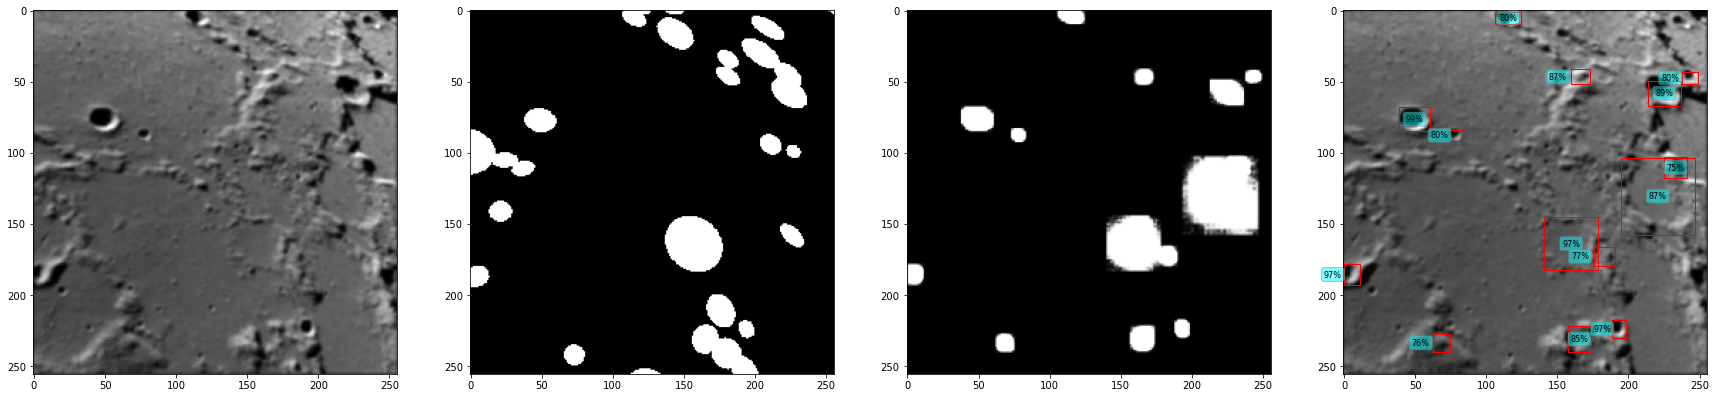

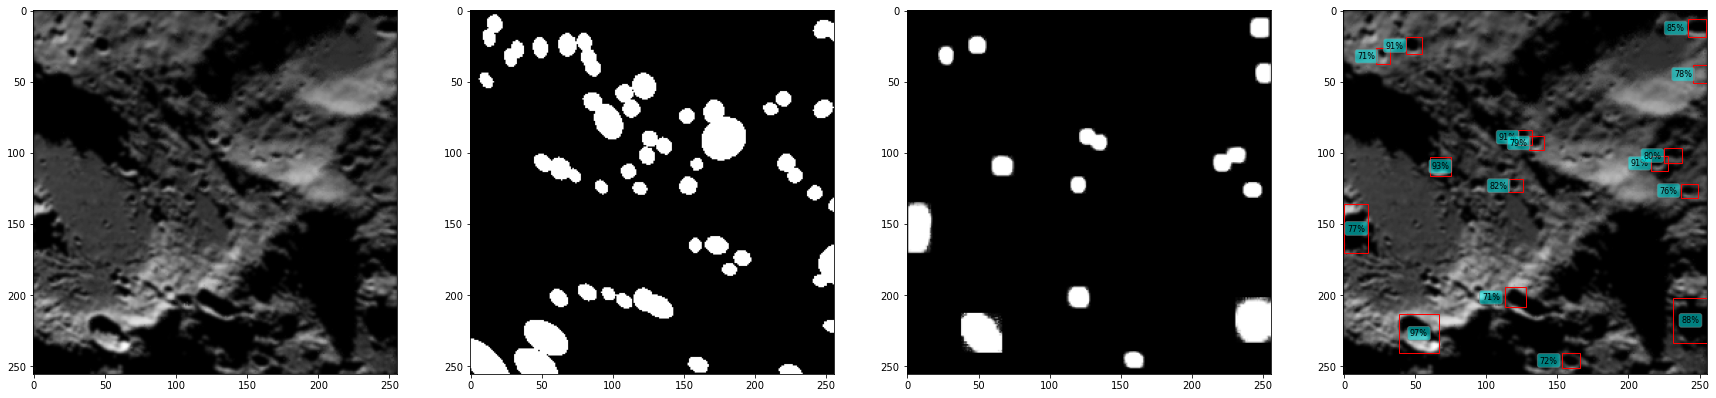

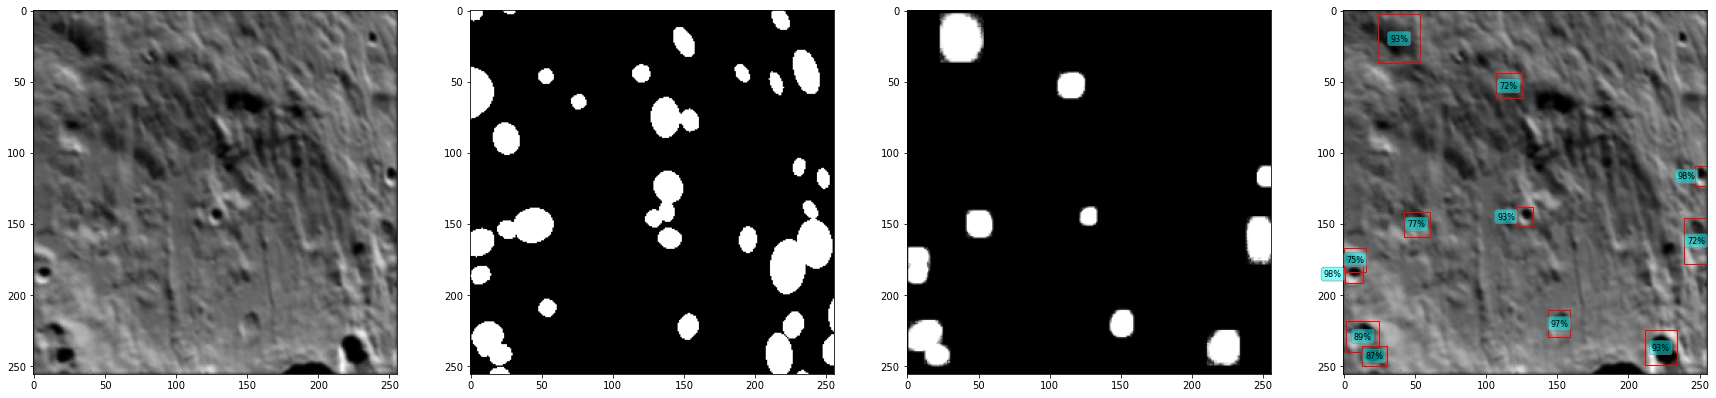

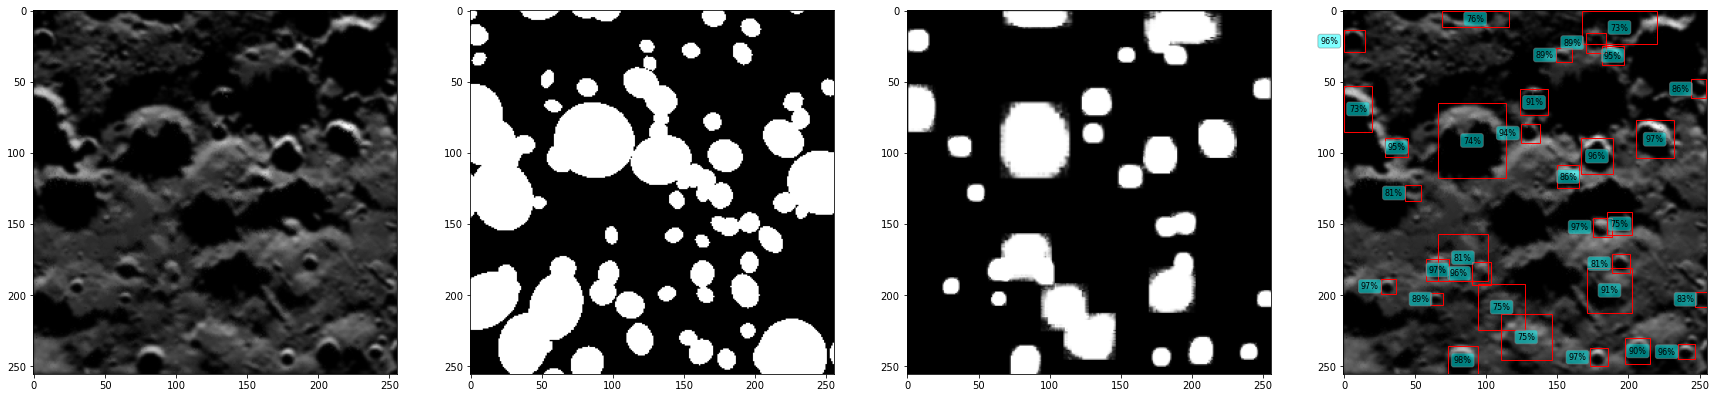

In [39]:
model.eval()
with torch.no_grad():
    images, targets = next(iter(test_loader))
    images = list(image.cuda() for image in images)
    targets = [{k: v.cuda() for k, v in t.items()} for t in targets]

    out = model(images)

min_score = 0.7

for i in range(test_loader.batch_size):
    boxes, labels, scores, masks = map(lambda x: x.cpu(), out[i].values())

    fig, axes = plt.subplots(1, 4, figsize=(30, 40))

    axes[0].imshow(images[i][0].cpu().numpy(), cmap='gray')
    axes[1].imshow(torch.sum(targets[i]['masks'], dim=0).clamp(0, 1).cpu().numpy(), cmap='gray')
    axes[2].imshow(torch.sum(out[i]['masks'][scores > min_score], dim=0).clamp(0, 1).cpu().numpy()[0], cmap='gray')
    draw_patches2(images[i].cpu(), boxes, labels, scores, min_score=min_score, ax=axes[3])

In [34]:
isinstance(masks, torch.Tensor)

True

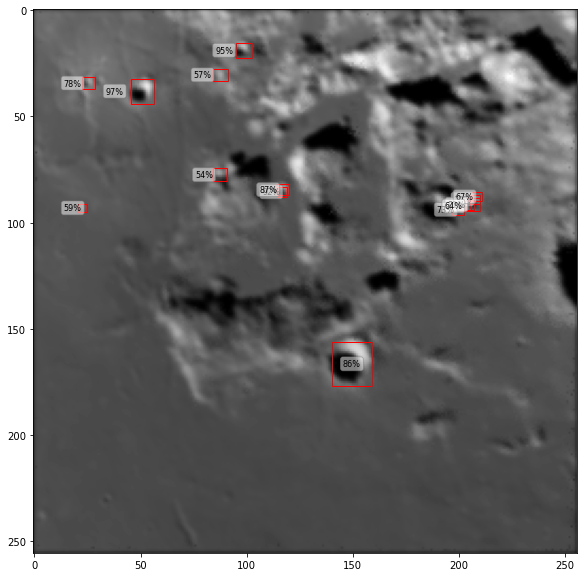

In [41]:
draw_patches2(images[i].cpu(), boxes, labels, scores, masks, min_score=min_score)